# Лабораторная работа №4.

### Задание 1. Генерация греческих строчных букв и удаление белых полей.

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt 
from csv import writer
from PIL import Image, ImageDraw, ImageFont, ImageChops

In [2]:
def letter_vert_trim(img):
    old = np.asarray(img)   
    rows, cols = old.shape
    new = np.zeros( (rows, cols) )            
    
    curr_row = 0
    for i in range(rows):
        flag = 0
        for j in range(cols):
            new[curr_row][j] = old[i][j]
            if old[i][j] < 255:
                #в строке найден кусочек буквы
                flag = 1
        if flag == 0:
            #удаление пустой строки
            new = np.delete(new, curr_row, 0)
        else:
            curr_row += 1
            
    new = new.astype(np.uint8)
    img_res = Image.fromarray(new)
    return img_res

In [3]:
def letter_hor_trim(img):
    old = np.asarray(img)   
    rows, cols = old.shape
    new = np.zeros( (rows, cols) )            
    
    curr_col = 0
    for j in range(cols):
        flag = 0
        for i in range(rows):
            new[i][curr_col] = old[i][j]
            if old[i][j] < 255:
                #в строке найден кусочек буквы
                flag = 1
        if flag == 0:
            #удаление пустой строки
            new = np.delete(new, curr_col, 1)
        else:
            curr_col += 1
            
    new = new.astype(np.uint8)
    img_res = Image.fromarray(new)
    return img_res

In [4]:
greek_alphabet = ['α','β','γ','δ','ε','ζ','η','θ','ι','κ','λ','μ','ν','ξ','ο','π','ρ','σ','τ','υ','φ','χ','ψ','ω','ιο', 'εν', 'ιν', 'ξη', 'συν']
eng_alphabet = ['a','b','g','d','e','z','h','th','i','k','l','m','n','x','o','p','r','s','t','u','ph','ch','ps','w', 'io', 'en', 'in', 'xh', 'sun']
parentPath = 'alphabet'
i = 0
for ch in greek_alphabet:
    fnt = ImageFont.truetype("times.ttf", 52, encoding="unic")
    w, h = fnt.getsize(ch)
    
    img = Image.new('L', (w, h), color='white')
    #font_y_offset = font.getoffset(ch)[1]
    
    d = ImageDraw.Draw(img)
    d.text((0,0), ch, font=fnt, fill=0, align="center")
    
    img = letter_vert_trim(img)
    img = letter_hor_trim(img)
    
    # тут бинаризация
    #fn = lambda x : 255 if x > 150 else 0
    #img = img.convert('L').point(fn, mode='1')
    
    img.save(parentPath + "\\" + eng_alphabet[i] + ".bmp")
    i += 1

### Задание 2. Наборы признаков.

In [18]:
result = ['name', 'weight', 'norm_weight', 'center_x', 'center_y', 'norm_center_x', 'norm_center_y', 'inertia_x', 'inertia_y', 'norm_inertia_x', 'norm_inertia_y']
with open('lab4_result.csv', 'a+', newline='') as write_obj:
    csv_writer = writer(write_obj)
    csv_writer.writerow(result)

for filename in os.listdir('alphabet'):
    img = Image.open('alphabet\\' + filename).convert('1')
    arr = np.asarray(img)   
    rows, cols = arr.shape
    print(filename,rows,cols)
    
    #вес черного
    weight = 0
    for i in range(rows):
        for j in range(cols):
            weight += (1 - arr[i][j])

    #удельный вес черного
    norm_weight = weight / (rows * cols)
    
    #координаты центра тяжести
    center_x = 0
    center_y = 0
    for i in range(rows):
        for j in range(cols):
            center_x += (j * (1 - arr[i][j]))
            center_y += (i * (1 - arr[i][j]))
    center_x = center_x / weight
    center_y = center_y / weight
    
    #нормированные координаты центра тяжести
    norm_center_x = (center_x - 1) / (cols - 1)
    norm_center_y = (center_y - 1) / (rows - 1)
    
    #осевые моменты инерции по горизонтали и вертикали
    inertia_x = 0
    inertia_y = 0
    for i in range(rows):
        for j in range(cols):
            inertia_x += (i - center_y)**2 * (1 - arr[i][j])
            inertia_y += (j - center_x)**2 * (1 - arr[i][j])
            
    #нормированные осевые моменты инерции
    norm_inertia_x = inertia_x / weight**2
    norm_inertia_y = inertia_y / weight**2
    #print(inertia_x, inertia_y, norm_inertia_x, norm_inertia_y)
    
    name = os.path.splitext(filename)[0]
    result = [name, weight, norm_weight, center_x, center_y, norm_center_x, norm_center_y, inertia_x, inertia_y, norm_inertia_x, norm_inertia_y]
    with open('lab4_result.csv', 'a+', newline='') as write_obj:
        csv_writer = writer(write_obj)
        csv_writer.writerow(result)

a.bmp 23 25
b.bmp 47 23
ch.bmp 34 25
d.bmp 36 22
e.bmp 23 20
en.bmp 23 44
g.bmp 34 23
h.bmp 34 25
i.bmp 23 15
in.bmp 23 37
io.bmp 23 39
k.bmp 23 27
l.bmp 36 26
m.bmp 34 26
n.bmp 23 23
o.bmp 23 24
p.bmp 23 26
ph.bmp 34 28
ps.bmp 34 32
r.bmp 34 23
s.bmp 23 26
sun.bmp 23 76
t.bmp 23 20
th.bmp 36 21
u.bmp 23 24
w.bmp 23 32
x.bmp 47 22
xh.bmp 47 47
z.bmp 48 21


In [19]:
import pandas as pd
df = pd.read_csv('lab4_result.csv', header=0) 

In [20]:
df

,name,weight,norm_weight,center_x,center_y,norm_center_x,norm_center_y,inertia_x,inertia_y,norm_inertia_x,norm_inertia_y
0,a,241,0.419130,11.224066,11.107884,0.426003,0.459449,11321.195021,12375.900415,0.194921,0.213080
1,b,372,0.344126,9.698925,21.067204,0.395406,0.436244,57563.319892,17836.279570,0.415968,0.128890
2,ch,255,0.300000,11.556863,16.858824,0.439869,0.480570,30342.917647,8134.925490,0.466635,0.125105
3,d,257,0.324495,10.906615,18.980545,0.471744,0.513730,26684.902724,9725.758755,0.404017,0.147251
4,e,166,0.360870,8.777108,11.289157,0.409321,0.467689,8740.120482,4936.753012,0.317177,0.179153
5,en,316,0.312253,19.867089,10.231013,0.438770,0.419591,15008.136076,52966.417722,0.150298,0.530428
6,g,173,0.221228,11.167630,12.393064,0.462165,0.345244,18007.271676,4062.138728,0.601666,0.135726
7,h,267,0.314118,14.573034,13.089888,0.565543,0.366360,22989.842697,12931.325843,0.322488,0.181393
8,i,108,0.313043,6.898148,11.509259,0.421296,0.477694,5134.990741,477.879630,0.440243,0.040970
9,in,258,0.303173,17.503876,10.085271,0.458441,0.412967,11388.124031,26392.496124,0.171085,0.396498


### Задание 3. Проекции.

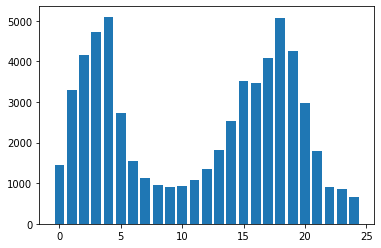

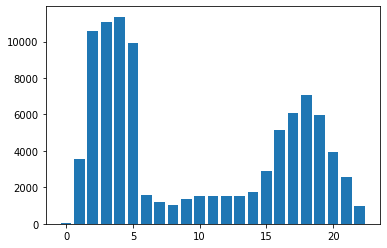

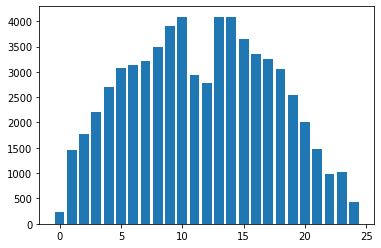

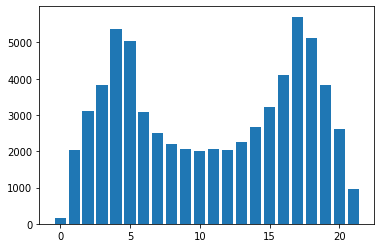

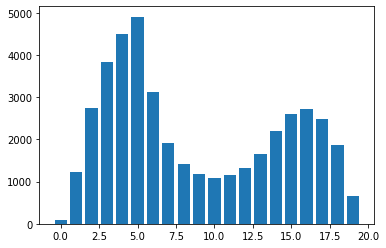

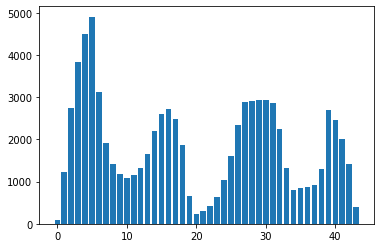

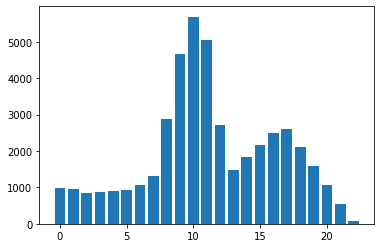

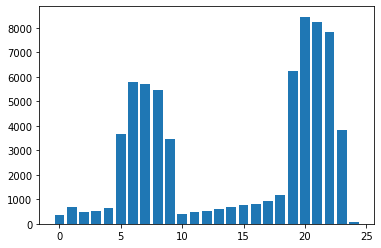

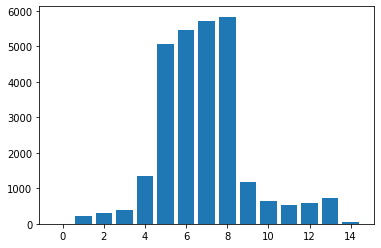

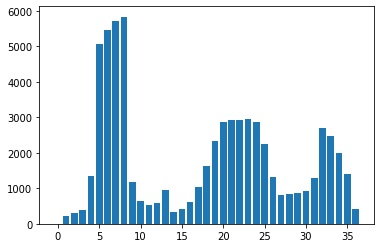

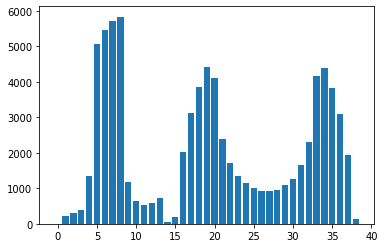

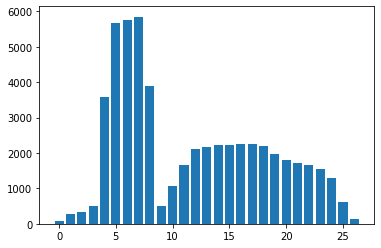

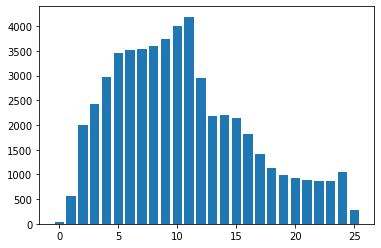

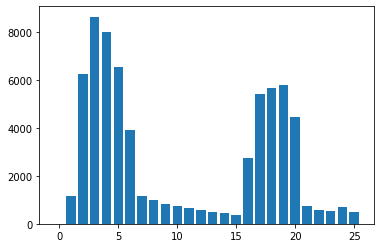

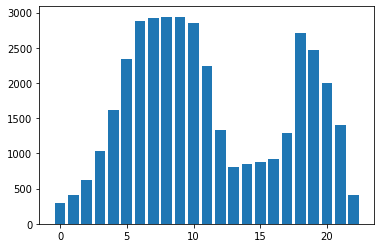

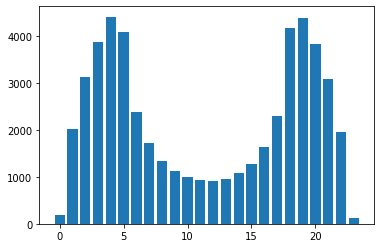

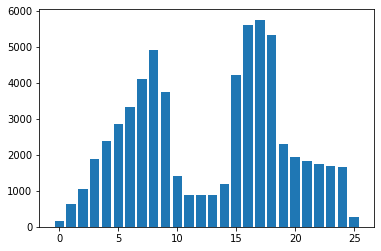

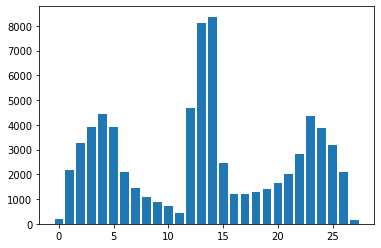

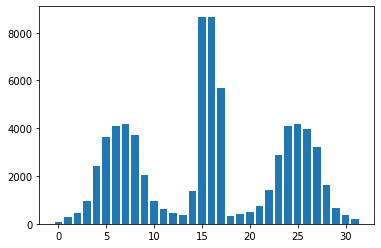

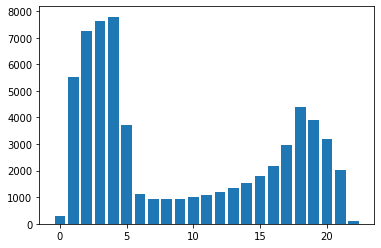

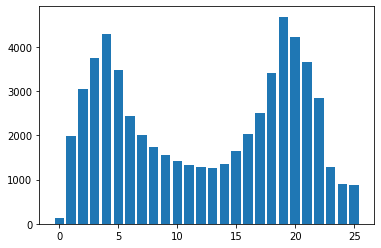

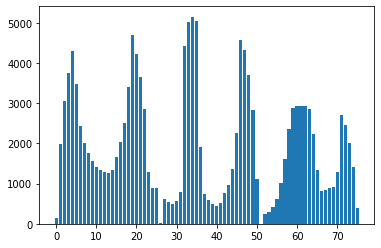

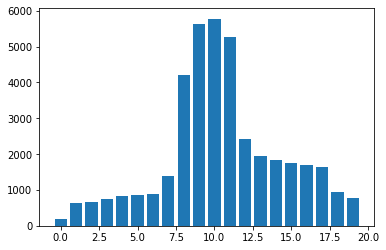

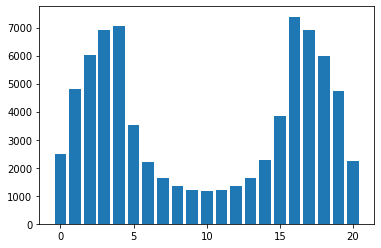

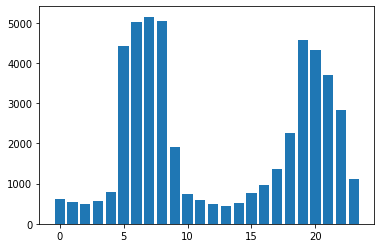

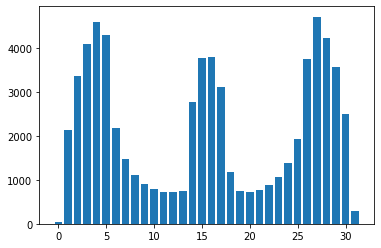

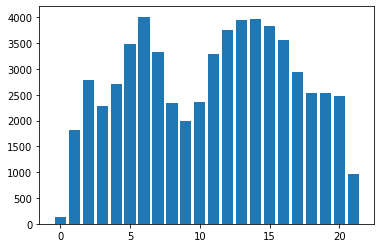

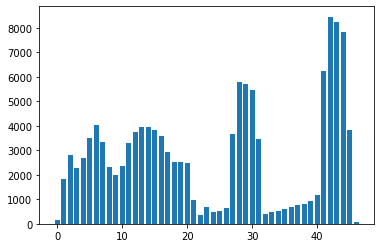

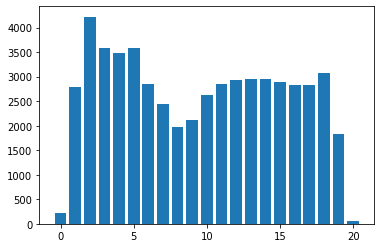

In [8]:
for filename in os.listdir('alphabet'):
    img = Image.open('alphabet\\' + filename).convert('L')
    arr = np.asarray(img)   
    rows, cols = arr.shape
    
    cols_results = []
    for j in range(cols):
        cols_sum = 0
        for i in range(rows):
            cols_sum += (255 - arr[i][j])
        cols_results.append(cols_sum)
    
    x = np.arange(cols)
    plt.bar(x,cols_results)
    name = os.path.splitext(filename)[0]
    plt.savefig('vertical_projection\\' + name + '.png')
    plt.show()

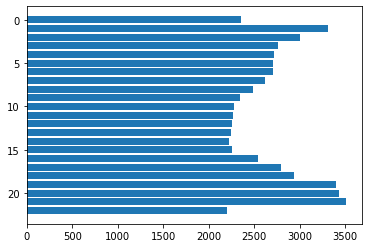

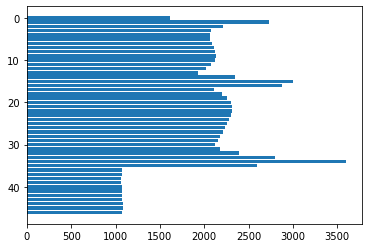

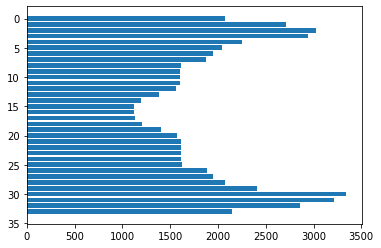

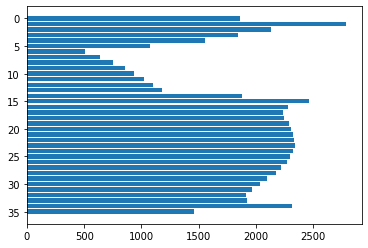

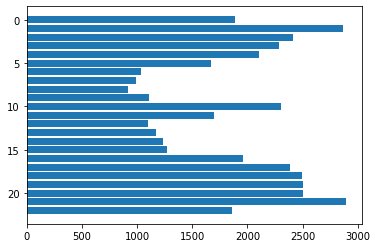

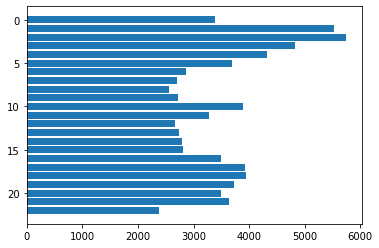

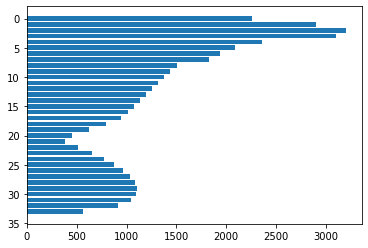

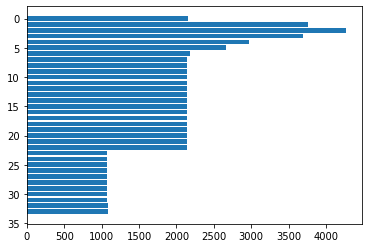

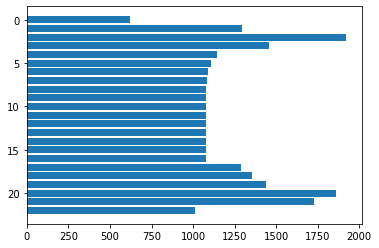

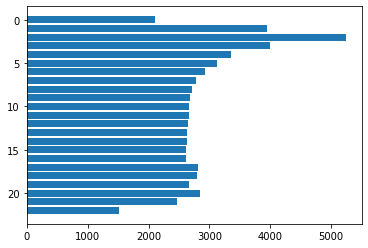

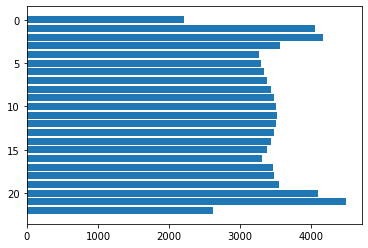

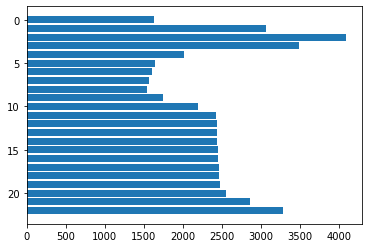

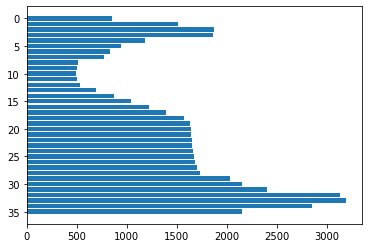

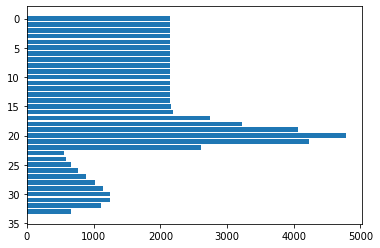

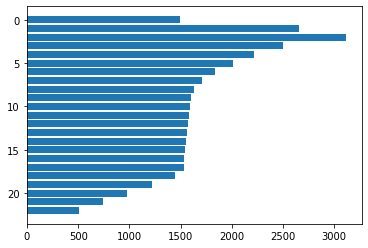

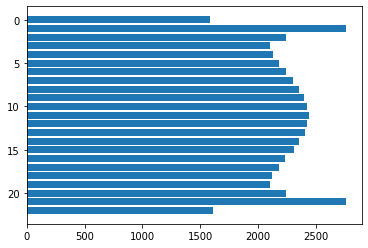

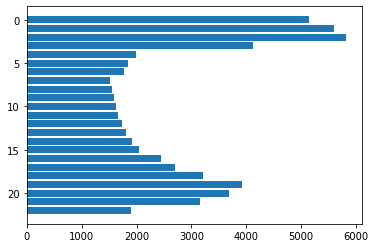

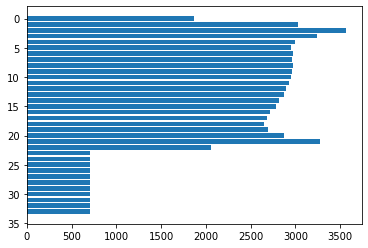

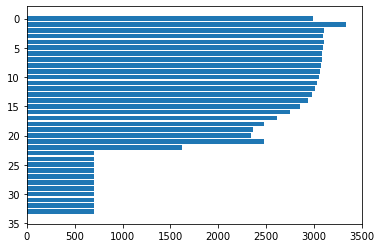

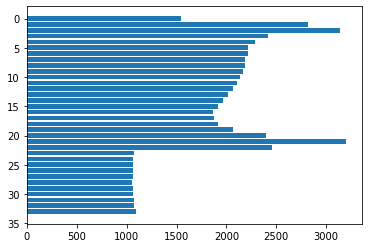

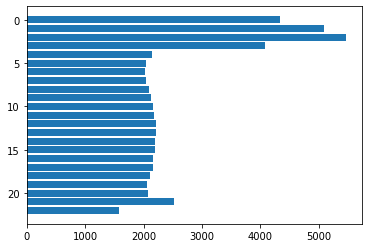

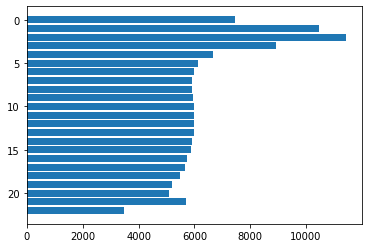

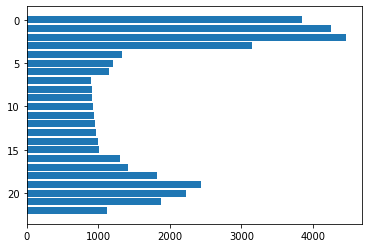

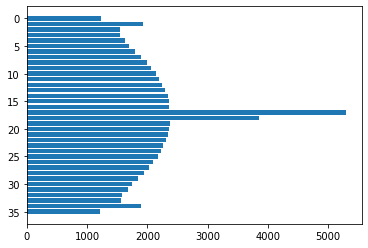

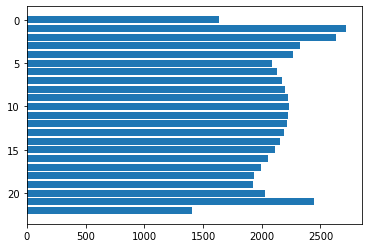

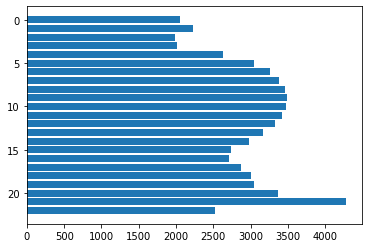

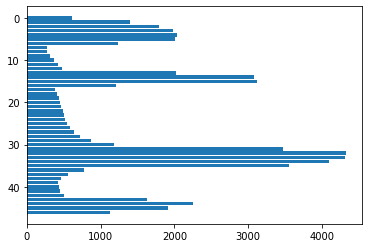

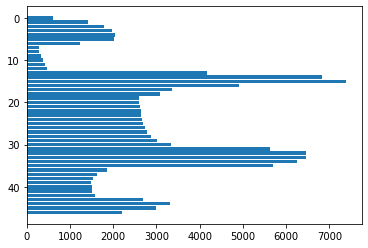

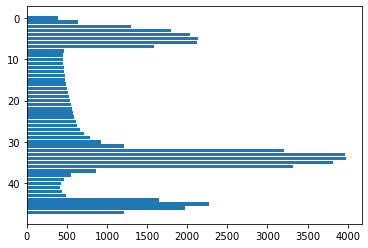

In [9]:
for filename in os.listdir('alphabet'):
    img = Image.open('alphabet\\' + filename).convert('L')
    arr = np.asarray(img)   
    rows, cols = arr.shape
    
    rows_results = []
    for i in range(rows):
        rows_sum = 0
        for j in range(cols):
            rows_sum += (255 - arr[i][j])
        rows_results.append(rows_sum)
        
    y = np.arange(rows)
    plt.barh(y, rows_results)
    plt.gca().invert_yaxis()
    name = os.path.splitext(filename)[0]
    plt.savefig('horizontal_projection\\' + name + '.png')
    plt.show()

# Example

In [10]:
img1 = Image.open("alphabet\\m.bmp")

In [11]:
img1

In [12]:
img1.size

(26, 34)

In [13]:
img2 = Image.open("horizontal_projection\\m.png")

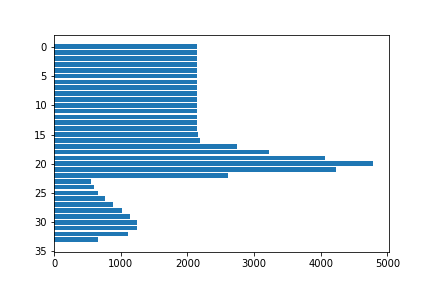

In [14]:
img2

In [15]:
img3 = Image.open("vertical_projection\\m.png")

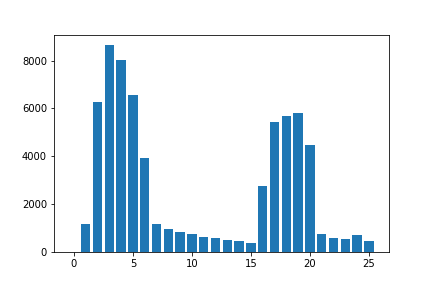

In [16]:
img3

In [17]:
df.loc[df.name == 'm']

,name,weight,norm_weight,center_x,center_y,norm_center_x,norm_center_y,inertia_x,inertia_y,norm_inertia_x,norm_inertia_y
10,m,269,0.3042986425339366,10.263940520446097,14.650557620817844,0.3705576208178439,0.4136532612369044,20193.152416356876,14454.26022304833,0.27906126803605363,0.1997520794771815
37,m,269,0.3042986425339366,10.263940520446097,14.650557620817844,0.3705576208178439,0.4136532612369044,20193.152416356876,14454.26022304833,0.27906126803605363,0.1997520794771815
